In [20]:
import  pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv('data/device2.csv')

In [16]:
df.describe()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
count,294938.000000,294938.000000,294938.000000,294938.000000,294938.000000,294938.000000,294938.000000,294938.000000,294938.000000,294938.000000
mean,446.489933,6.064600,1288.851068,121.439630,378.981956,66.462104,898.230726,652.222718,25.688501,45.915904
std,1079.557437,1173.871705,1995.723702,214.154156,108.839640,15.534745,175.668274,66.679676,2.751049,6.718153
min,-32330.000000,-32754.000000,2.360000,0.000000,109.000000,24.000000,8.000000,458.000000,19.300000,24.700000
25%,417.000000,44.000000,552.932500,35.240000,306.000000,57.000000,924.000000,613.000000,23.900000,42.500000
50%,435.000000,49.000000,873.390000,81.240000,387.000000,67.000000,940.000000,652.000000,25.400000,46.100000
75%,457.000000,58.000000,1424.997500,150.550000,454.000000,76.000000,948.000000,696.000000,26.900000,49.300000
max,28739.000000,17443.000000,47740.070000,7734.170000,848.000000,303.000000,987.000000,937.000000,42.800000,85.900000


In [17]:
df2 = df[(df != 0).all(axis=1)].dropna()


In [18]:
df2.describe()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
count,285682.000000,285682.000000,285682.000000,285682.000000,285682.000000,285682.000000,285682.000000,285682.000000,285682.000000,285682.000000
mean,442.514583,5.747523,1324.221847,125.368394,382.815662,66.910446,908.502643,654.822113,25.652560,46.008845
std,1078.305395,1184.799244,2017.761766,216.462452,106.893179,15.277306,150.768316,64.615864,2.663888,6.575041
min,-32330.000000,-32754.000000,2.360000,0.010000,109.000000,24.000000,8.000000,458.000000,19.300000,24.700000
25%,417.000000,44.000000,580.962500,39.380000,312.000000,58.000000,926.000000,615.000000,23.900000,42.700000
50%,435.000000,49.000000,897.050000,84.510000,390.000000,67.000000,940.000000,654.000000,25.400000,46.200000
75%,456.000000,58.000000,1452.567500,153.797500,456.000000,76.000000,949.000000,697.000000,26.900000,49.300000
max,26787.000000,17443.000000,47740.070000,7734.170000,848.000000,303.000000,987.000000,937.000000,40.600000,85.900000


In [19]:
df2["ts"] = pd.to_datetime(df["ts"], format='mixed', errors='coerce')
df2.set_index("ts", inplace=True)  # Set timestamp as index

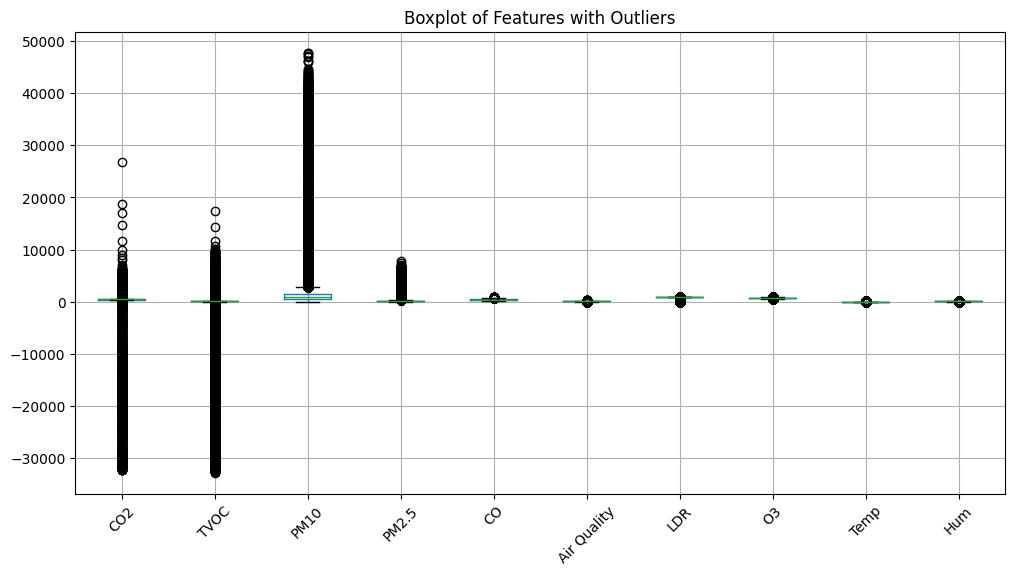

In [21]:
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()

Q1 = df2[num_cols].quantile(0.25)
Q3 = df2[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df2[num_cols] < lower_bound) | (df2[num_cols] > upper_bound))

# Draw boxplots
plt.figure(figsize=(12, 6))
df2[num_cols].boxplot(rot=45)
plt.title("Boxplot of Features with Outliers")
plt.show()

In [ ]:
df2 = df2[~outliers.any(axis=1)]  # Keep only non-outlier rows


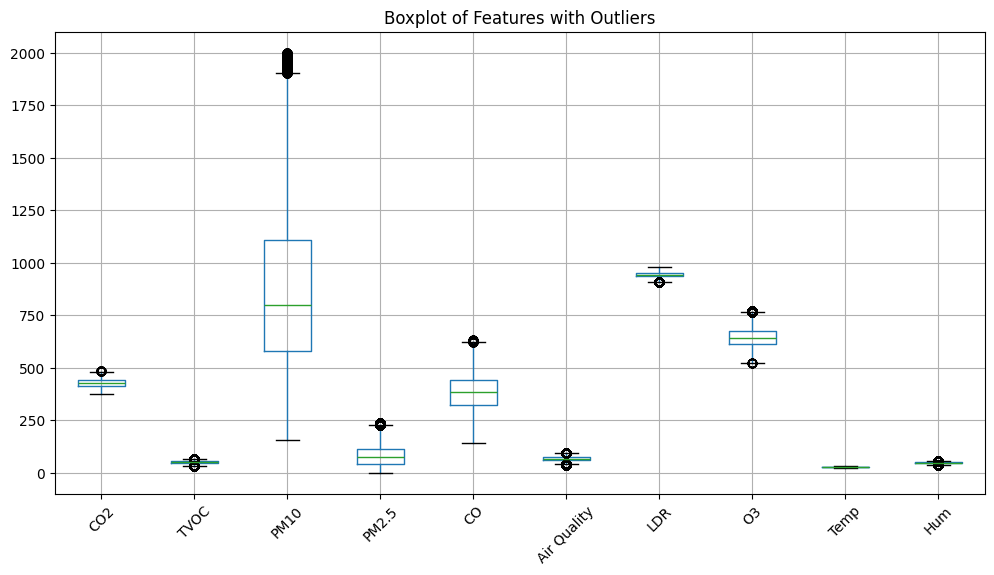

In [23]:
for _ in range(2):  # Run twice to catch new outliers
    Q1 = df2[num_cols].quantile(0.25)
    Q3 = df2[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df2[num_cols] < lower_bound) | (df2[num_cols] > upper_bound))
    df2 = df2[~outliers.any(axis=1)]  # Remove outliers again


# Draw boxplots
plt.figure(figsize=(12, 6))
df2[num_cols].boxplot(rot=45)
plt.title("Boxplot of Features with Outliers")
plt.show()

In [24]:
df2.shape

(128848, 10)

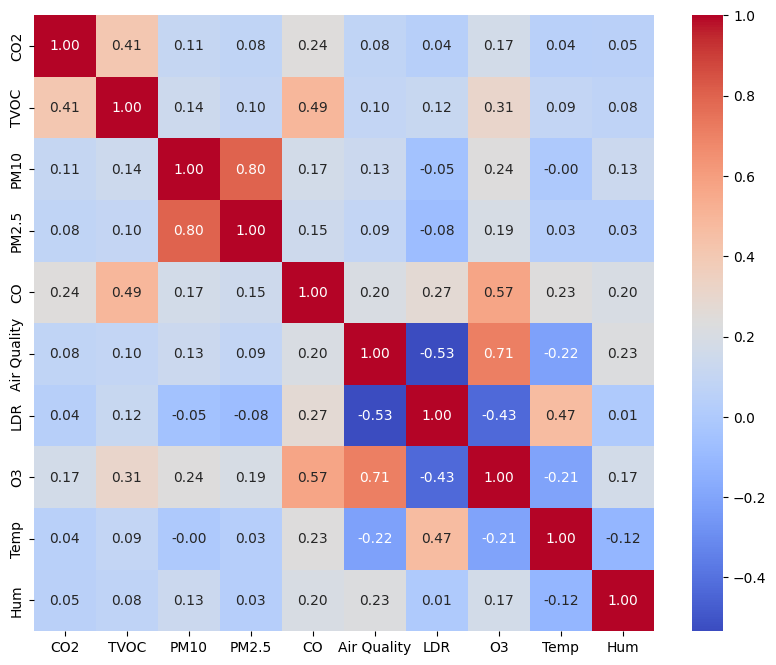

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df2.corr()  # No need to drop anything

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
